In [1]:
import pandas as pd
original = pd.read_csv("/content/drive/MyDrive/AquaMan/fish_daily_report.csv", encoding='cp949')

In [2]:
original

,No,양식장,날짜,라벨,라벨2(어장_수조_샘플번호_날짜_길이_무게_사이즈),체장(mm),체중(g),수조번호,사육미수,일일폐사량,사료정보,일일 사료 급이량(KG),투약일자,약품명,투여량(ML 또는 L),투여단위,투여방법,기타사항,검출 병원체
0,88,OS,220704,OS070401,F01_U01_O0088_D2022-07-04_L420_W0749_S3,420,749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
1,89,OS,220704,OS070402,F01_U01_O0089_D2022-07-04_L335_W0379_S2,335,379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,90,OS,220704,OS070403,F01_U01_O0090_D2022-07-04_L325_W0295_S2,325,295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
3,91,OS,220704,OS070404,F01_U01_O0091_D2022-07-04_L345_W0407_S2,345,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
4,92,OS,220704,OS070405,F01_U01_O0092_D2022-07-04_L370_W0573_S3,370,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,3798,GM,221111,GM111101,F20_U01_O3798_D2022-11-25_L220_W0083_S1,220,83,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3798,3799,GM,221111,GM111102,F20_U01_O3799_D2022-11-25_L220_W0078_S1,220,78,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3799,3800,GM,221111,GM111103,F20_U01_O3800_D2022-11-25_L200_W0061_S1,200,61,10동3,8000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0
3800,3801,GM,221111,GM111104,F20_U01_O3801_D2022-11-25_L240_W0108_S1,240,108,10동4,6000.0,NaN,배합사료(EP),80.0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
original.drop(columns=['No','라벨','라벨2(어장_수조_샘플번호_날짜_길이_무게_사이즈)','일일폐사량','투약일자', '약품명', '투여량(ML 또는 L)', '투여단위', '투여방법', '기타사항', '검출 병원체', '수조번호'], inplace = True)

In [4]:
original.dropna(inplace=True)
original['개별 사료 급이량(g)'] = (original['일일 사료 급이량(KG)'].values / original['사육미수'].values) * 1000
original.drop(columns=['사육미수','일일 사료 급이량(KG)'], inplace=True)
original

,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
15,IC,220704,345,500,생사료(MP),29.090909
16,IC,220704,380,673,생사료(MP),29.090909
17,IC,220704,355,410,생사료(MP),29.090909
18,IC,220704,330,312,생사료(MP),29.090909
19,IC,220704,345,514,생사료(MP),29.090909
...,...,...,...,...,...,...
3797,GM,221111,220,83,배합사료(EP),10.000000
3798,GM,221111,220,78,배합사료(EP),10.000000
3799,GM,221111,200,61,배합사료(EP),10.000000
3800,GM,221111,240,108,배합사료(EP),13.333333


In [5]:
grouped = original.groupby('양식장')

In [6]:

from IPython.display import display

for name, group in grouped:
    print(f"Group: {name}, 총 개체수 {len(group)}")
    display(group)
# HM(1143), IC(1506), OS(631, NAN 데이터 살짝) TP(447)

Group: DK, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2677,DK,220930,305,252,생사료(MP),33.333333


Group: DS, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2676,DS,220930,300,265,생사료(MP),33.333333


Group: GM, 총 개체수 15


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3357,GM,221027,155,40,배합사료(EP),10.000000
3358,GM,221027,120,16,배합사료(EP),10.000000
3359,GM,221027,130,20,배합사료(EP),10.000000
3360,GM,221027,165,43,배합사료(EP),10.000000
3361,GM,221027,130,15,배합사료(EP),10.000000
3362,GM,221027,135,21,배합사료(EP),10.000000
3363,GM,221027,125,14,배합사료(EP),10.000000
3364,GM,221027,130,16,배합사료(EP),10.000000
3365,GM,221027,120,13,배합사료(EP),10.000000
3366,GM,221027,130,21,배합사료(EP),10.000000


Group: HB, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3120,HB,221018,444,718,생사료(MP),45.454545
3121,HB,221018,400,641,생사료(MP),45.454545


Group: HD, 총 개체수 10


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
797,HD,220803,310,293,생사료(MP),22.857143
798,HD,220803,310,378,생사료(MP),22.857143
799,HD,220803,265,189,생사료(MP),22.857143
1019,HD,220810,290,241,생사료(MP),22.857143
1020,HD,220810,290,206,생사료(MP),22.857143
1021,HD,220810,305,258,생사료(MP),22.857143
2078,HD,220914,205,74,생사료(MP),10.000000
2079,HD,220914,200,62,생사료(MP),10.000000
2080,HD,220914,330,324,생사료(MP),22.857143
2081,HD,220914,320,363,생사료(MP),22.857143


Group: HJ, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3010,HJ,221014,370,323,생사료(MP),31.25
3011,HJ,221014,390,488,생사료(MP),31.25


Group: HM, 총 개체수 941


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
58,HM,220705,265,216,생사료(MP),21.917808
59,HM,220705,230,149,생사료(MP),21.917808
60,HM,220705,240,173,생사료(MP),21.917808
61,HM,220705,245,172,생사료(MP),21.917808
62,HM,220705,235,176,생사료(MP),21.917808
...,...,...,...,...,...,...
3634,HM,221107,330,319,생사료(MP),28.571429
3635,HM,221107,360,463,생사료(MP),28.571429
3636,HM,221107,320,306,생사료(MP),28.571429
3637,HM,221107,325,337,생사료(MP),28.571429


Group: HY, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
740,HY,220801,290,181,배합사료(EP),31.25
741,HY,220801,340,408,배합사료(EP),31.25


Group: IC, 총 개체수 1389


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
15,IC,220704,345,500,생사료(MP),29.090909
16,IC,220704,380,673,생사료(MP),29.090909
17,IC,220704,355,410,생사료(MP),29.090909
18,IC,220704,330,312,생사료(MP),29.090909
19,IC,220704,345,514,생사료(MP),29.090909
...,...,...,...,...,...,...
3792,IC,221111,165,43,배합사료(EP),6.779661
3793,IC,221111,175,54,배합사료(EP),6.779661
3794,IC,221111,160,40,배합사료(EP),6.779661
3795,IC,221111,155,32,배합사료(EP),6.779661


Group: IS, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3168,IS,221019,330,310,생사료(MP),26.666667


Group: JH, 총 개체수 20


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
983,JH,220809,360,499,생사료(MP),28.571429
984,JH,220809,335,388,생사료(MP),28.571429
985,JH,220809,360,430,생사료(MP),28.571429
986,JH,220809,420,715,생사료(MP),28.571429
1128,JH,220816,360,527,생사료(MP),26.666667
1129,JH,220816,395,484,생사료(MP),26.666667
1130,JH,220816,370,603,생사료(MP),26.666667
1131,JH,220816,430,883,생사료(MP),26.666667
1132,JH,220816,420,705,생사료(MP),26.666667
1133,JH,220816,410,798,생사료(MP),26.666667


Group: KL, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3169,KL,221019,385,386,생사료(MP),26.666667


Group: OS, 총 개체수 449


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
243,OS,220712,300,290,생사료(MP),28.571429
244,OS,220712,310,243,생사료(MP),28.571429
245,OS,220712,405,697,생사료(MP),28.571429
246,OS,220712,345,452,생사료(MP),28.571429
247,OS,220712,305,271,생사료(MP),28.571429
...,...,...,...,...,...,...
3644,OS,221107,375,563,생사료(MP),25.714286
3645,OS,221107,400,627,생사료(MP),28.571429
3646,OS,221107,365,456,생사료(MP),28.571429
3647,OS,221107,360,333,생사료(MP),28.571429


Group: SD, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3020,SD,221014,480,989,생사료(MP),50.0
3021,SD,221014,450,1046,생사료(MP),50.0


Group: SW, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3108,SW,221018,335,294,생사료(MP),40.0
3109,SW,221018,355,301,생사료(MP),40.0


Group: TP, 총 개체수 429


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
73,TP,220706,365,543,생사료(MP),22.857143
74,TP,220706,405,735,생사료(MP),22.857143
75,TP,220706,360,418,생사료(MP),22.857143
76,TP,220706,345,409,생사료(MP),22.857143
77,TP,220706,370,522,생사료(MP),22.857143
...,...,...,...,...,...,...
3451,TP,221028,327,365,생사료(MP),28.571429
3452,TP,221028,350,381,생사료(MP),28.571429
3453,TP,221028,355,369,생사료(MP),31.250000
3454,TP,221028,352,346,생사료(MP),31.250000


Group: YJ, 총 개체수 2


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
3090,YJ,221018,315,314,생사료(MP),35.555556
3091,YJ,221018,290,260,생사료(MP),35.555556


Group: YR, 총 개체수 1


,양식장,날짜,체장(mm),체중(g),사료정보,개별 사료 급이량(g)
2675,YR,220930,310,277,생사료(MP),30.0


# OS 양식장

In [7]:
os_group = grouped.get_group("OS")
os_group = os_group.dropna(subset=['개별 사료 급이량(g)'])
print(os_group['날짜'].unique())

[220712 220718 220719 220720 220725 220726 220801 220802 220803 220808
 220809 220816 220907 220913 220919 220926 220927 220928 221004 221005
 221012 221018 221024 221025 221026 221031 221101 221102 221107]


In [8]:
start_date = pd.to_datetime('2022-07-12')
os_group['날짜'] = pd.to_datetime(os_group['날짜'], format='%y%m%d')
os_group['지난 일수'] = (os_group['날짜'] - start_date).dt.days
os_group.drop(columns='날짜', inplace=True)
day_list = os_group['지난 일수'].unique()

In [9]:
df = os_group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
df['사료정보'] = os_group.groupby('지난 일수')['사료정보'].unique()
temp = len(df)
for _ in range(temp) :
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])

display(df)

<ipython-input-9-424d3333526e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = os_group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-9-424d3333526e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-9-424d3333526e>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-9-424d3333526e>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-9-424d3333526e>:6: FutureWarning: The frame.append method is deprecated and wil

,체장(mm),체중(g),개별 사료 급이량(g),사료정보
지난 일수,,,,
0,315.0,332.0,28.571429,[생사료(MP)]
6,345.0,369.0,28.571429,[생사료(MP)]
13,350.0,407.0,28.571429,[생사료(MP)]
21,370.0,481.5,28.571429,[생사료(MP)]
27,380.0,563.0,34.285714,[생사료(MP)]


In [10]:
last_day = df.index.max()
new_index = pd.Index(range(last_day + 1), name='지난 일수')

# 지난 일수를 인덱스로 설정하고 새로운 인덱스와 합쳐서 결측치 보간
df = df.reindex(new_index).interpolate(method='linear')
df['사료정보'] = df['사료정보'].fillna(method='ffill')
df

,체장(mm),체중(g),개별 사료 급이량(g),사료정보
지난 일수,,,,
0,315.000000,332.000000,28.571429,[생사료(MP)]
1,320.000000,338.166667,28.571429,[생사료(MP)]
2,325.000000,344.333333,28.571429,[생사료(MP)]
3,330.000000,350.500000,28.571429,[생사료(MP)]
4,335.000000,356.666667,28.571429,[생사료(MP)]
5,340.000000,362.833333,28.571429,[생사료(MP)]
6,345.000000,369.000000,28.571429,[생사료(MP)]
7,345.714286,374.428571,28.571429,[생사료(MP)]
8,346.428571,379.857143,28.571429,[생사료(MP)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-package

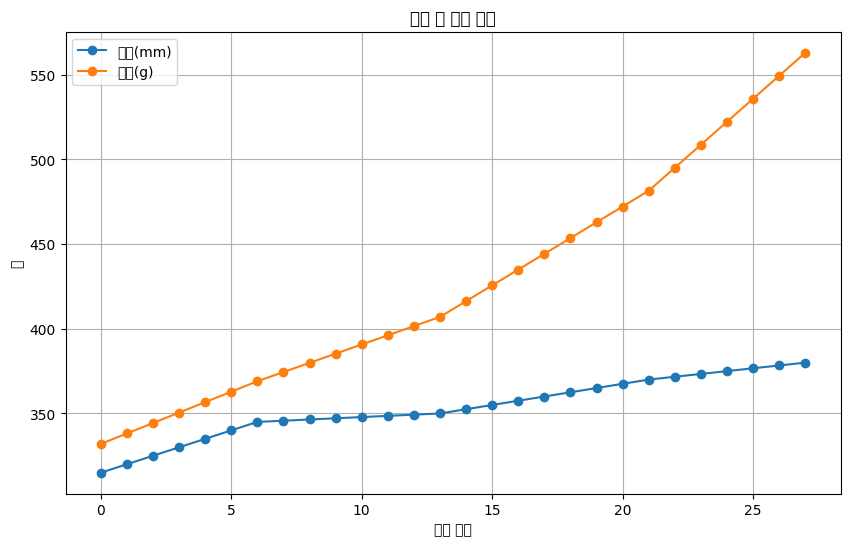

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(df.index, df['체장(mm)'], marker='o', label='체장(mm)')  # 체장 데이터 plot
plt.plot(df.index, df['체중(g)'], marker='o', label='체중(g)')  # 체중 데이터 plot
plt.xlabel('지난 일수')  # x축 레이블
plt.ylabel('값')  # y축 레이블
plt.title('체장 및 체중 변화')  # 그래프 제목
plt.legend()  # 범례 추가
plt.grid(True)  # 그리드 추가
plt.show()  # 그래프 출력

# 사료 정보가 있는 양식장에 대해서 RNN train

In [12]:
for item in ['OS','IC','HM','TP','GM', 'JH'] :
  group = grouped.get_group(item)
  group = group.dropna(subset=['개별 사료 급이량(g)'])


  group['날짜'] = pd.to_datetime(group['날짜'], format='%y%m%d')
  group['지난 일수'] = (group['날짜'] - group['날짜'].iloc[0]).dt.days
  group.drop(columns='날짜', inplace=True)
  day_list = group['지난 일수'].unique()

  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
  temp = len(df)
  for _ in range(temp) :
    df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
    df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])

  last_day = df.index.max()
  new_index = pd.Index(range(last_day + 1), name='지난 일수')

  # 지난 일수를 인덱스로 설정하고 새로운 인덱스와 합쳐서 결측치 보간
  df = df.reindex(new_index).interpolate(method='linear')
  df['7일 후 체장(mm)'] = df['체장(mm)'].shift(-7)
  df['7일 후 체중(g)'] = df['체중(g)'].shift(-7)

  # 뒤의 7개 행 삭제
  df = df[:-7]
  df.to_csv("/content/" + item + "_data.csv", index=False)

  display(df)

<ipython-input-12-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,315.000000,332.000000,28.571429,345.714286,374.428571
1,320.000000,338.166667,28.571429,346.428571,379.857143
2,325.000000,344.333333,28.571429,347.142857,385.285714
3,330.000000,350.500000,28.571429,347.857143,390.714286
4,335.000000,356.666667,28.571429,348.571429,396.142857
5,340.000000,362.833333,28.571429,349.285714,401.571429
6,345.000000,369.000000,28.571429,350.000000,407.000000
7,345.714286,374.428571,28.571429,352.500000,416.312500
8,346.428571,379.857143,28.571429,355.000000,425.625000


<ipython-input-12-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,345.000000,480.000000,29.090909,359.000000,541.600000
1,347.000000,488.800000,28.888757,361.000000,550.400000
2,349.000000,497.600000,28.686605,363.000000,559.200000
3,351.000000,506.400000,28.484454,365.000000,568.000000
4,353.000000,515.200000,28.282302,367.000000,576.800000
...,...,...,...,...,...
91,441.849315,796.863014,33.463903,445.445205,812.541096
92,442.363014,799.102740,33.630286,445.958904,814.780822
93,442.876712,801.342466,33.796669,446.472603,817.020548


<ipython-input-12-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,235.000000,136.00,21.917808,260.0,173.000000
1,235.000000,136.00,14.598540,260.0,175.571429
2,240.000000,149.00,14.507772,260.0,178.142857
3,241.250000,150.75,14.640228,260.0,180.714286
4,242.500000,152.50,14.772683,260.0,183.285714
...,...,...,...,...,...
87,318.333333,337.00,24.221267,323.5,352.600000
88,318.750000,338.00,24.288400,324.5,360.700000
89,319.166667,339.00,24.355532,325.5,368.800000


<ipython-input-12-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,345.000000,412.000000,22.857143,346.666667,414.666667
1,345.238095,412.380952,22.857143,346.904762,415.047619
2,345.476190,412.761905,22.857143,347.142857,415.428571
3,345.714286,413.142857,22.857143,347.380952,415.809524
4,345.952381,413.523810,22.857143,347.619048,416.190476
...,...,...,...,...,...
89,401.250000,596.500000,30.625000,405.227273,616.545455
90,401.818182,599.363636,30.681818,405.795455,619.409091
91,402.386364,602.227273,30.738636,406.363636,622.272727


<ipython-input-12-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,130.0,18.000000,10.0,172.0,48.333333
1,136.0,22.333333,10.0,178.0,52.666667
2,142.0,26.666667,10.0,184.0,57.000000
3,148.0,31.000000,10.0,190.0,61.333333
4,154.0,35.333333,10.0,196.0,65.666667
5,160.0,39.666667,10.0,202.0,70.000000
6,166.0,44.000000,10.0,208.0,74.333333
7,172.0,48.333333,10.0,214.0,78.666667
8,178.0,52.666667,10.0,220.0,83.000000


<ipython-input-12-a59139b045a2>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = group.groupby('지난 일수')['체장(mm)', '체중(g)','개별 사료 급이량(g)'].median()
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체중(g)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.iloc[0:1].append(df[df['체장(mm)'].diff() >= 0])
<ipython-input-12-a59139b045a2>:15: FutureWarning: The frame.append method is deprecated 

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g)
지난 일수,,,,,
0,360.0,464.5,28.571429,385.0,617.5


In [13]:
# sample prediction
for item in ['HD'] :
  group = grouped.get_group(item)
  group = group.dropna(subset=['개별 사료 급이량(g)'])

  df = group[['체장(mm)','체중(g)','개별 사료 급이량(g)']]
  df.to_csv("/content/" + item + "_data.csv", index=False)


In [14]:
import pandas as pd
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 데이터 로드
data1 = pd.read_csv("/content/OS_data.csv")
data2 = pd.read_csv("/content/IC_data.csv")
data3 = pd.read_csv("/content/HM_data.csv")
data4 = pd.read_csv("/content/TP_data.csv")
data5 = pd.read_csv("/content/GM_data.csv")

df_list = [data2, data3, data4, data5]
df_test = data1
train_data = pd.concat(df_list)
train_data = train_data.sample(frac=1).reset_index()

test_data = df_test

# 입력 및 출력 데이터 선택
X_train = train_data[['체장(mm)', '체중(g)', '개별 사료 급이량(g)']].values
X_test = test_data[['체장(mm)', '체중(g)', '개별 사료 급이량(g)']].values

y_train_1 = train_data['7일 후 체장(mm)'].values
y_train_2 = train_data['7일 후 체중(g)'].values

# 데이터 스케일링
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# RNN 모델 구성
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', input_shape=input_shape, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 체장 예측 모델 학습
rnn_model_length = build_rnn_model((X_train_scaled.shape[1], 1))
rnn_model_length.fit(X_train_scaled.reshape((-1, 3, 1)), y_train_1, epochs=100, batch_size=32, verbose=0)

# 체중 예측 모델 학습
rnn_model_weight = build_rnn_model((X_train_scaled.shape[1], 1))
rnn_model_weight.fit(X_train_scaled.reshape((-1, 3, 1)), y_train_2, epochs=100, batch_size=32, verbose=0)

In [15]:
# 예측
prediction1 = rnn_model_length.predict(X_test_scaled.reshape((-1, 3, 1)))
prediction2 = rnn_model_weight.predict(X_test_scaled.reshape((-1, 3, 1)))

1/1 [==============================] - 0s 121ms/step


In [16]:
# 결과 저장
result = pd.DataFrame(test_data)
result['7일 후 체장(mm) 예측'] = prediction1
result['7일 후 체중(g) 예측'] = prediction2

# 결과 출력
display(result)

,체장(mm),체중(g),개별 사료 급이량(g),7일 후 체장(mm),7일 후 체중(g),7일 후 체장(mm) 예측,7일 후 체중(g) 예측
0,315.000000,332.000000,28.571429,345.714286,374.428571,324.885040,415.322083
1,320.000000,338.166667,28.571429,346.428571,379.857143,329.091492,425.549377
2,325.000000,344.333333,28.571429,347.142857,385.285714,333.297974,435.776672
3,330.000000,350.500000,28.571429,347.857143,390.714286,337.504425,446.004059
4,335.000000,356.666667,28.571429,348.571429,396.142857,341.710907,456.231384
5,340.000000,362.833333,28.571429,349.285714,401.571429,345.917297,466.458740
6,345.000000,369.000000,28.571429,350.000000,407.000000,350.123779,476.686066
7,345.714286,374.428571,28.571429,352.500000,416.312500,350.897064,478.521210
8,346.428571,379.857143,28.571429,355.000000,425.625000,351.670349,480.356323
9,347.142857,385.285714,28.571429,357.500000,434.937500,352.443604,482.191437


In [17]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.2 MB/s eta 0:00:00


# 하이퍼 파라미터 튜닝 (체장예측)

In [18]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import optuna


def objective(trial):
    # 하이퍼파라미터 설정
    params = {
        'rnn_units': trial.suggest_int('rnn_units', 20, 200),
        'dense_units': trial.suggest_int('dense_units', 10, 100),
        'batch_size': trial.suggest_int('batch_size', 16, 64),
        'epochs': trial.suggest_int('epochs', 10, 100)
    }

    # RNN 모델 구성
    model = Sequential()
    model.add(SimpleRNN(params['rnn_units'], activation='relu', input_shape=(3, 1)))
    model.add(Dense(params['dense_units'], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 데이터 스케일링 및 변환
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train).reshape((-1, 3, 1))
    X_test_scaled = scaler.transform(X_test).reshape((-1, 3, 1))

    # 모델 학습
    model.fit(X_train_scaled, y_train_1, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # 예측 및 평가
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(test_data['7일 후 체장(mm)'], y_pred)

    return mse

# 하이퍼파라미터 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters:', study.best_params)
print('Best MSE:', study.best_value)


[I 2023-11-27 05:47:01,774] A new study created in memory with name: no-name-cc1dd1b8-a003-486f-a8c9-6e130cf0fadc


1/1 [==============================] - 0s 187ms/step


[I 2023-11-27 05:47:05,929] Trial 0 finished with value: 140.64925965110595 and parameters: {'rnn_units': 147, 'dense_units': 42, 'batch_size': 28, 'epochs': 14}. Best is trial 0 with value: 140.64925965110595.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:47:10,101] Trial 1 finished with value: 95.4366870996299 and parameters: {'rnn_units': 83, 'dense_units': 88, 'batch_size': 64, 'epochs': 31}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 126ms/step


[I 2023-11-27 05:47:17,233] Trial 2 finished with value: 98.46462139101727 and parameters: {'rnn_units': 107, 'dense_units': 65, 'batch_size': 17, 'epochs': 69}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 195ms/step


[I 2023-11-27 05:47:19,535] Trial 3 finished with value: 5593.569109517938 and parameters: {'rnn_units': 142, 'dense_units': 85, 'batch_size': 43, 'epochs': 10}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:47:26,005] Trial 4 finished with value: 120.05295982679895 and parameters: {'rnn_units': 179, 'dense_units': 20, 'batch_size': 18, 'epochs': 33}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:47:32,295] Trial 5 finished with value: 116.6819779901011 and parameters: {'rnn_units': 168, 'dense_units': 13, 'batch_size': 49, 'epochs': 85}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 192ms/step


[I 2023-11-27 05:47:36,192] Trial 6 finished with value: 115.20919086132066 and parameters: {'rnn_units': 50, 'dense_units': 69, 'batch_size': 20, 'epochs': 30}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 121ms/step


[I 2023-11-27 05:47:47,253] Trial 7 finished with value: 115.3901636165421 and parameters: {'rnn_units': 193, 'dense_units': 96, 'batch_size': 24, 'epochs': 82}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 133ms/step


[I 2023-11-27 05:47:50,591] Trial 8 finished with value: 91834.3804591986 and parameters: {'rnn_units': 38, 'dense_units': 62, 'batch_size': 52, 'epochs': 14}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 428ms/step


[I 2023-11-27 05:47:53,697] Trial 9 finished with value: 95535.36432655161 and parameters: {'rnn_units': 29, 'dense_units': 71, 'batch_size': 53, 'epochs': 15}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 224ms/step


[I 2023-11-27 05:48:00,799] Trial 10 finished with value: 104.93234692064624 and parameters: {'rnn_units': 80, 'dense_units': 42, 'batch_size': 64, 'epochs': 52}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 126ms/step


[I 2023-11-27 05:48:04,986] Trial 11 finished with value: 118.72175790907689 and parameters: {'rnn_units': 102, 'dense_units': 86, 'batch_size': 33, 'epochs': 57}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 117ms/step


[I 2023-11-27 05:48:08,220] Trial 12 finished with value: 120.62027550992045 and parameters: {'rnn_units': 86, 'dense_units': 50, 'batch_size': 63, 'epochs': 67}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 186ms/step


[I 2023-11-27 05:48:12,779] Trial 13 finished with value: 125.8511369174498 and parameters: {'rnn_units': 124, 'dense_units': 82, 'batch_size': 38, 'epochs': 41}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 132ms/step


[I 2023-11-27 05:48:20,115] Trial 14 finished with value: 126.73265743640266 and parameters: {'rnn_units': 68, 'dense_units': 94, 'batch_size': 32, 'epochs': 98}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 129ms/step


[I 2023-11-27 05:48:23,873] Trial 15 finished with value: 111.63781492022116 and parameters: {'rnn_units': 109, 'dense_units': 76, 'batch_size': 57, 'epochs': 70}. Best is trial 1 with value: 95.4366870996299.


1/1 [==============================] - 0s 191ms/step


[I 2023-11-27 05:48:28,197] Trial 16 finished with value: 91.94129997616093 and parameters: {'rnn_units': 61, 'dense_units': 59, 'batch_size': 43, 'epochs': 45}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:48:32,261] Trial 17 finished with value: 99.60818220347525 and parameters: {'rnn_units': 56, 'dense_units': 34, 'batch_size': 44, 'epochs': 43}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 129ms/step


[I 2023-11-27 05:48:34,816] Trial 18 finished with value: 3186.2237561825245 and parameters: {'rnn_units': 20, 'dense_units': 55, 'batch_size': 58, 'epochs': 30}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 119ms/step


[I 2023-11-27 05:48:37,450] Trial 19 finished with value: 112.4674697243205 and parameters: {'rnn_units': 84, 'dense_units': 99, 'batch_size': 37, 'epochs': 24}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 118ms/step


[I 2023-11-27 05:48:40,685] Trial 20 finished with value: 100.05060166704746 and parameters: {'rnn_units': 60, 'dense_units': 27, 'batch_size': 47, 'epochs': 47}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 125ms/step


[I 2023-11-27 05:48:48,074] Trial 21 finished with value: 96.71974922078923 and parameters: {'rnn_units': 97, 'dense_units': 62, 'batch_size': 24, 'epochs': 62}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 117ms/step


[I 2023-11-27 05:48:52,938] Trial 22 finished with value: 133.01164160698286 and parameters: {'rnn_units': 94, 'dense_units': 51, 'batch_size': 25, 'epochs': 60}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:48:56,706] Trial 23 finished with value: 115.50908876154993 and parameters: {'rnn_units': 128, 'dense_units': 60, 'batch_size': 33, 'epochs': 35}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 180ms/step


[I 2023-11-27 05:49:01,404] Trial 24 finished with value: 100.0248328335169 and parameters: {'rnn_units': 71, 'dense_units': 77, 'batch_size': 42, 'epochs': 48}. Best is trial 16 with value: 91.94129997616093.


1/1 [==============================] - 0s 121ms/step


[I 2023-11-27 05:49:04,326] Trial 25 finished with value: 63.30169395958059 and parameters: {'rnn_units': 123, 'dense_units': 38, 'batch_size': 59, 'epochs': 23}. Best is trial 25 with value: 63.30169395958059.


1/1 [==============================] - 0s 134ms/step


[I 2023-11-27 05:49:07,133] Trial 26 finished with value: 50.41941145803995 and parameters: {'rnn_units': 124, 'dense_units': 40, 'batch_size': 60, 'epochs': 22}. Best is trial 26 with value: 50.41941145803995.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:49:09,499] Trial 27 finished with value: 107.97503942580313 and parameters: {'rnn_units': 131, 'dense_units': 41, 'batch_size': 58, 'epochs': 22}. Best is trial 26 with value: 50.41941145803995.


1/1 [==============================] - 0s 133ms/step


[I 2023-11-27 05:49:11,836] Trial 28 finished with value: 195.5533005023012 and parameters: {'rnn_units': 159, 'dense_units': 32, 'batch_size': 54, 'epochs': 21}. Best is trial 26 with value: 50.41941145803995.


1/1 [==============================] - 0s 186ms/step


[I 2023-11-27 05:49:15,342] Trial 29 finished with value: 118.12496767274044 and parameters: {'rnn_units': 119, 'dense_units': 44, 'batch_size': 61, 'epochs': 39}. Best is trial 26 with value: 50.41941145803995.


1/1 [==============================] - 0s 149ms/step


[I 2023-11-27 05:49:19,576] Trial 30 finished with value: 22.795822316257713 and parameters: {'rnn_units': 151, 'dense_units': 24, 'batch_size': 49, 'epochs': 20}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 124ms/step


[I 2023-11-27 05:49:22,206] Trial 31 finished with value: 96.23418366610284 and parameters: {'rnn_units': 145, 'dense_units': 23, 'batch_size': 48, 'epochs': 24}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 132ms/step


[I 2023-11-27 05:49:24,483] Trial 32 finished with value: 26.957013529616326 and parameters: {'rnn_units': 161, 'dense_units': 37, 'batch_size': 55, 'epochs': 17}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:49:26,659] Trial 33 finished with value: 575.2981343801985 and parameters: {'rnn_units': 158, 'dense_units': 35, 'batch_size': 56, 'epochs': 16}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:49:28,707] Trial 34 finished with value: 109329.64268367343 and parameters: {'rnn_units': 139, 'dense_units': 28, 'batch_size': 61, 'epochs': 10}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 184ms/step


[I 2023-11-27 05:49:32,104] Trial 35 finished with value: 75.94370271375826 and parameters: {'rnn_units': 157, 'dense_units': 12, 'batch_size': 52, 'epochs': 20}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 132ms/step


[I 2023-11-27 05:49:35,563] Trial 36 finished with value: 108.95739037063173 and parameters: {'rnn_units': 182, 'dense_units': 18, 'batch_size': 50, 'epochs': 27}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:49:38,016] Trial 37 finished with value: 130.44574058366823 and parameters: {'rnn_units': 168, 'dense_units': 38, 'batch_size': 60, 'epochs': 35}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 123ms/step


[I 2023-11-27 05:49:40,282] Trial 38 finished with value: 81.6522573698827 and parameters: {'rnn_units': 115, 'dense_units': 45, 'batch_size': 55, 'epochs': 18}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 130ms/step


[I 2023-11-27 05:49:43,898] Trial 39 finished with value: 126.83521592240997 and parameters: {'rnn_units': 133, 'dense_units': 28, 'batch_size': 50, 'epochs': 26}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 180ms/step


[I 2023-11-27 05:49:46,752] Trial 40 finished with value: 2153.4733806513195 and parameters: {'rnn_units': 181, 'dense_units': 47, 'batch_size': 45, 'epochs': 11}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 207ms/step


[I 2023-11-27 05:49:50,295] Trial 41 finished with value: 1576.364502949415 and parameters: {'rnn_units': 160, 'dense_units': 13, 'batch_size': 59, 'epochs': 19}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:49:54,537] Trial 42 finished with value: 86.2878091814524 and parameters: {'rnn_units': 149, 'dense_units': 18, 'batch_size': 52, 'epochs': 28}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 116ms/step


[I 2023-11-27 05:49:56,664] Trial 43 finished with value: 1858.7792839813872 and parameters: {'rnn_units': 200, 'dense_units': 11, 'batch_size': 54, 'epochs': 14}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 130ms/step


[I 2023-11-27 05:49:59,138] Trial 44 finished with value: 97.17638134358155 and parameters: {'rnn_units': 152, 'dense_units': 24, 'batch_size': 62, 'epochs': 33}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 121ms/step


[I 2023-11-27 05:50:01,464] Trial 45 finished with value: 275.2472973529579 and parameters: {'rnn_units': 171, 'dense_units': 16, 'batch_size': 51, 'epochs': 19}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 184ms/step


[I 2023-11-27 05:50:04,592] Trial 46 finished with value: 2321.142238117138 and parameters: {'rnn_units': 141, 'dense_units': 39, 'batch_size': 64, 'epochs': 13}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 119ms/step


[I 2023-11-27 05:50:08,360] Trial 47 finished with value: 107.61426227287704 and parameters: {'rnn_units': 174, 'dense_units': 31, 'batch_size': 55, 'epochs': 37}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:50:10,712] Trial 48 finished with value: 22.97056107803445 and parameters: {'rnn_units': 136, 'dense_units': 22, 'batch_size': 57, 'epochs': 21}. Best is trial 30 with value: 22.795822316257713.


1/1 [==============================] - 0s 127ms/step


[I 2023-11-27 05:50:14,469] Trial 49 finished with value: 85.15559043556475 and parameters: {'rnn_units': 119, 'dense_units': 23, 'batch_size': 57, 'epochs': 31}. Best is trial 30 with value: 22.795822316257713.


Best hyperparameters: {'rnn_units': 151, 'dense_units': 24, 'batch_size': 49, 'epochs': 20}
Best MSE: 22.795822316257713


# 하이퍼 파라미터 튜닝(체중 예측)

In [19]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import optuna


def objective(trial):
    # 하이퍼파라미터 설정
    params = {
        'rnn_units': trial.suggest_int('rnn_units', 20, 200),
        'dense_units': trial.suggest_int('dense_units', 10, 100),
        'batch_size': trial.suggest_int('batch_size', 16, 64),
        'epochs': trial.suggest_int('epochs', 10, 100)
    }

    # RNN 모델 구성
    model = Sequential()
    model.add(SimpleRNN(params['rnn_units'], activation='relu', input_shape=(3, 1)))
    model.add(Dense(params['dense_units'], activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 데이터 스케일링 및 변환
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train).reshape((-1, 3, 1))
    X_test_scaled = scaler.transform(X_test).reshape((-1, 3, 1))

    # 모델 학습
    model.fit(X_train_scaled, y_train_2, epochs=params['epochs'], batch_size=params['batch_size'], verbose=0)

    # 예측 및 평가
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(test_data['7일 후 체중(g)'], y_pred)

    return mse

# 하이퍼파라미터 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters:', study.best_params)
print('Best MSE:', study.best_value)


[I 2023-11-27 05:50:22,309] A new study created in memory with name: no-name-980b1ada-7a4c-4d6d-8da0-7c28e233f22d


1/1 [==============================] - 0s 132ms/step


[I 2023-11-27 05:50:26,843] Trial 0 finished with value: 864.7626339329746 and parameters: {'rnn_units': 38, 'dense_units': 79, 'batch_size': 33, 'epochs': 72}. Best is trial 0 with value: 864.7626339329746.


1/1 [==============================] - 0s 131ms/step


[I 2023-11-27 05:50:29,934] Trial 1 finished with value: 2016.1498888438377 and parameters: {'rnn_units': 74, 'dense_units': 99, 'batch_size': 39, 'epochs': 39}. Best is trial 0 with value: 864.7626339329746.


1/1 [==============================] - 0s 180ms/step


[I 2023-11-27 05:50:36,775] Trial 2 finished with value: 555.1607634539545 and parameters: {'rnn_units': 137, 'dense_units': 41, 'batch_size': 27, 'epochs': 65}. Best is trial 2 with value: 555.1607634539545.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:50:40,680] Trial 3 finished with value: 511.1906605493239 and parameters: {'rnn_units': 87, 'dense_units': 41, 'batch_size': 37, 'epochs': 58}. Best is trial 3 with value: 511.1906605493239.


1/1 [==============================] - 0s 118ms/step


[I 2023-11-27 05:50:46,952] Trial 4 finished with value: 559.6022351368604 and parameters: {'rnn_units': 88, 'dense_units': 10, 'batch_size': 37, 'epochs': 100}. Best is trial 3 with value: 511.1906605493239.


1/1 [==============================] - 0s 205ms/step


[I 2023-11-27 05:50:51,495] Trial 5 finished with value: 2839.671482978709 and parameters: {'rnn_units': 138, 'dense_units': 84, 'batch_size': 52, 'epochs': 22}. Best is trial 3 with value: 511.1906605493239.


1/1 [==============================] - 0s 130ms/step


[I 2023-11-27 05:50:55,606] Trial 6 finished with value: 488.6059744346917 and parameters: {'rnn_units': 194, 'dense_units': 60, 'batch_size': 43, 'epochs': 59}. Best is trial 6 with value: 488.6059744346917.


1/1 [==============================] - 0s 119ms/step


[I 2023-11-27 05:50:59,159] Trial 7 finished with value: 2710.835316097109 and parameters: {'rnn_units': 59, 'dense_units': 14, 'batch_size': 61, 'epochs': 79}. Best is trial 6 with value: 488.6059744346917.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:51:02,661] Trial 8 finished with value: 1022.071822153747 and parameters: {'rnn_units': 145, 'dense_units': 20, 'batch_size': 43, 'epochs': 60}. Best is trial 6 with value: 488.6059744346917.


1/1 [==============================] - 0s 187ms/step


[I 2023-11-27 05:51:06,919] Trial 9 finished with value: 2429.041183909052 and parameters: {'rnn_units': 163, 'dense_units': 28, 'batch_size': 39, 'epochs': 33}. Best is trial 6 with value: 488.6059744346917.


1/1 [==============================] - 0s 124ms/step


[I 2023-11-27 05:51:18,774] Trial 10 finished with value: 467.68600100646154 and parameters: {'rnn_units': 198, 'dense_units': 63, 'batch_size': 18, 'epochs': 93}. Best is trial 10 with value: 467.68600100646154.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:51:31,142] Trial 11 finished with value: 382.4799867488676 and parameters: {'rnn_units': 199, 'dense_units': 64, 'batch_size': 16, 'epochs': 100}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 125ms/step


[I 2023-11-27 05:51:42,688] Trial 12 finished with value: 647.3247336546015 and parameters: {'rnn_units': 193, 'dense_units': 68, 'batch_size': 17, 'epochs': 100}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 185ms/step


[I 2023-11-27 05:51:51,897] Trial 13 finished with value: 560.921252993789 and parameters: {'rnn_units': 171, 'dense_units': 47, 'batch_size': 16, 'epochs': 85}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 117ms/step


[I 2023-11-27 05:52:00,019] Trial 14 finished with value: 473.73019783769286 and parameters: {'rnn_units': 198, 'dense_units': 66, 'batch_size': 25, 'epochs': 88}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 121ms/step


[I 2023-11-27 05:52:06,725] Trial 15 finished with value: 546.7189966818901 and parameters: {'rnn_units': 115, 'dense_units': 52, 'batch_size': 23, 'epochs': 90}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 119ms/step


[I 2023-11-27 05:52:13,269] Trial 16 finished with value: 637.154846042773 and parameters: {'rnn_units': 174, 'dense_units': 76, 'batch_size': 20, 'epochs': 43}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 119ms/step


[I 2023-11-27 05:52:19,550] Trial 17 finished with value: 502.72730306956043 and parameters: {'rnn_units': 168, 'dense_units': 90, 'batch_size': 30, 'epochs': 75}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 132ms/step


[I 2023-11-27 05:52:21,976] Trial 18 finished with value: 3088.248020499842 and parameters: {'rnn_units': 116, 'dense_units': 60, 'batch_size': 22, 'epochs': 11}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 177ms/step


[I 2023-11-27 05:52:28,103] Trial 19 finished with value: 495.0916079356468 and parameters: {'rnn_units': 153, 'dense_units': 71, 'batch_size': 52, 'epochs': 93}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 121ms/step


[I 2023-11-27 05:52:32,094] Trial 20 finished with value: 651.9010299744741 and parameters: {'rnn_units': 184, 'dense_units': 35, 'batch_size': 31, 'epochs': 46}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 118ms/step


[I 2023-11-27 05:52:38,239] Trial 21 finished with value: 393.71689465183124 and parameters: {'rnn_units': 199, 'dense_units': 65, 'batch_size': 25, 'epochs': 86}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 145ms/step


[I 2023-11-27 05:52:49,267] Trial 22 finished with value: 470.490084794777 and parameters: {'rnn_units': 200, 'dense_units': 55, 'batch_size': 16, 'epochs': 82}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 1s 1s/step


[I 2023-11-27 05:52:59,740] Trial 23 finished with value: 439.3347823901292 and parameters: {'rnn_units': 181, 'dense_units': 62, 'batch_size': 20, 'epochs': 95}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 137ms/step


[I 2023-11-27 05:53:05,235] Trial 24 finished with value: 534.1779961725616 and parameters: {'rnn_units': 181, 'dense_units': 75, 'batch_size': 27, 'epochs': 69}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 212ms/step


[I 2023-11-27 05:53:14,486] Trial 25 finished with value: 494.00950009604145 and parameters: {'rnn_units': 160, 'dense_units': 52, 'batch_size': 21, 'epochs': 99}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 124ms/step


[I 2023-11-27 05:53:21,294] Trial 26 finished with value: 390.5450569881118 and parameters: {'rnn_units': 183, 'dense_units': 87, 'batch_size': 26, 'epochs': 81}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 181ms/step


[I 2023-11-27 05:53:27,230] Trial 27 finished with value: 538.4197580566562 and parameters: {'rnn_units': 123, 'dense_units': 89, 'batch_size': 28, 'epochs': 79}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 126ms/step


[I 2023-11-27 05:53:34,020] Trial 28 finished with value: 414.0914184443928 and parameters: {'rnn_units': 152, 'dense_units': 97, 'batch_size': 33, 'epochs': 86}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 123ms/step


[I 2023-11-27 05:53:38,554] Trial 29 finished with value: 457.70113579013855 and parameters: {'rnn_units': 44, 'dense_units': 82, 'batch_size': 34, 'epochs': 71}. Best is trial 11 with value: 382.4799867488676.


1/1 [==============================] - 0s 185ms/step


[I 2023-11-27 05:53:45,884] Trial 30 finished with value: 380.2938751690305 and parameters: {'rnn_units': 186, 'dense_units': 90, 'batch_size': 24, 'epochs': 73}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 144ms/step


[I 2023-11-27 05:53:52,487] Trial 31 finished with value: 406.1645313019503 and parameters: {'rnn_units': 183, 'dense_units': 89, 'batch_size': 24, 'epochs': 75}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 181ms/step


[I 2023-11-27 05:53:58,904] Trial 32 finished with value: 1182.304682820789 and parameters: {'rnn_units': 24, 'dense_units': 80, 'batch_size': 25, 'epochs': 65}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 123ms/step


[I 2023-11-27 05:54:05,623] Trial 33 finished with value: 581.5596642230541 and parameters: {'rnn_units': 189, 'dense_units': 100, 'batch_size': 30, 'epochs': 51}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 127ms/step


[I 2023-11-27 05:54:13,024] Trial 34 finished with value: 428.33408768386187 and parameters: {'rnn_units': 173, 'dense_units': 95, 'batch_size': 19, 'epochs': 80}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 118ms/step


[I 2023-11-27 05:54:20,208] Trial 35 finished with value: 457.0975228213602 and parameters: {'rnn_units': 101, 'dense_units': 73, 'batch_size': 27, 'epochs': 66}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 122ms/step


[I 2023-11-27 05:54:25,455] Trial 36 finished with value: 515.5588685342806 and parameters: {'rnn_units': 128, 'dense_units': 84, 'batch_size': 34, 'epochs': 89}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 184ms/step


[I 2023-11-27 05:54:34,990] Trial 37 finished with value: 702.8531917123711 and parameters: {'rnn_units': 156, 'dense_units': 93, 'batch_size': 22, 'epochs': 95}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:54:41,438] Trial 38 finished with value: 616.8979123201934 and parameters: {'rnn_units': 178, 'dense_units': 78, 'batch_size': 51, 'epochs': 75}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 194ms/step


[I 2023-11-27 05:54:48,613] Trial 39 finished with value: 389.1542629874833 and parameters: {'rnn_units': 138, 'dense_units': 86, 'batch_size': 25, 'epochs': 83}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 136ms/step


[I 2023-11-27 05:54:53,315] Trial 40 finished with value: 599.7198717128385 and parameters: {'rnn_units': 142, 'dense_units': 88, 'batch_size': 36, 'epochs': 53}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 120ms/step


[I 2023-11-27 05:54:59,629] Trial 41 finished with value: 426.7505344258385 and parameters: {'rnn_units': 189, 'dense_units': 84, 'batch_size': 26, 'epochs': 83}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 191ms/step


[I 2023-11-27 05:55:07,048] Trial 42 finished with value: 633.940259433677 and parameters: {'rnn_units': 93, 'dense_units': 69, 'batch_size': 28, 'epochs': 77}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 117ms/step


[I 2023-11-27 05:55:15,078] Trial 43 finished with value: 510.67558673804126 and parameters: {'rnn_units': 166, 'dense_units': 43, 'batch_size': 19, 'epochs': 90}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 197ms/step


[I 2023-11-27 05:55:19,419] Trial 44 finished with value: 1392.7920290082827 and parameters: {'rnn_units': 79, 'dense_units': 93, 'batch_size': 64, 'epochs': 83}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 134ms/step


[I 2023-11-27 05:55:25,448] Trial 45 finished with value: 482.41301149566 and parameters: {'rnn_units': 190, 'dense_units': 85, 'batch_size': 45, 'epochs': 61}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 135ms/step


[I 2023-11-27 05:55:32,868] Trial 46 finished with value: 519.3956055623967 and parameters: {'rnn_units': 199, 'dense_units': 65, 'batch_size': 23, 'epochs': 97}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 128ms/step


[I 2023-11-27 05:55:39,980] Trial 47 finished with value: 428.35355715016937 and parameters: {'rnn_units': 129, 'dense_units': 57, 'batch_size': 30, 'epochs': 71}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 130ms/step


[I 2023-11-27 05:55:48,647] Trial 48 finished with value: 736.1639093064903 and parameters: {'rnn_units': 192, 'dense_units': 78, 'batch_size': 18, 'epochs': 91}. Best is trial 30 with value: 380.2938751690305.


1/1 [==============================] - 0s 145ms/step


[I 2023-11-27 05:55:57,564] Trial 49 finished with value: 490.3117550412459 and parameters: {'rnn_units': 61, 'dense_units': 72, 'batch_size': 24, 'epochs': 86}. Best is trial 30 with value: 380.2938751690305.


Best hyperparameters: {'rnn_units': 186, 'dense_units': 90, 'batch_size': 24, 'epochs': 73}
Best MSE: 380.2938751690305
